In [2]:
from jupyter_dash import JupyterDash # jupyter dash

In [3]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app = JupyterDash(__name__, external_stylesheets=external_stylesheets) # jupyter dash

df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')

available_indicators = df['Indicator Name'].unique()

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='crossfilter-xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Fertility rate, total (births per woman)'
            ),
            dcc.RadioItems(
                id='crossfilter-xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='crossfilter-yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Life expectancy at birth, total (years)'
            ),
            dcc.RadioItems(
                id='crossfilter-yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        id='crossfilter-year--slider',
        min=df['Year'].min(),
        max=df['Year'].max(),
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()},
        step=None
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@app.callback(
    dash.dependencies.Output('crossfilter-indicator-scatter', 'figure'),
    [dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-year--slider', 'value')])

def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name']
            )

    fig.update_traces(customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])

    fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    return fig


def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='Year', y='Value')

    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       bgcolor='rgba(255, 255, 255, 0.5)', text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})

    return fig


@app.callback(
    dash.dependencies.Output('x-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value')])

def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@app.callback(
    dash.dependencies.Output('y-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value')])
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)

In [4]:
# if __name__ == '__main__':
# app.run_server(debug=True,port=8001)

app.run_server(mode="jupyterlab", port=8022)

# cloning with new dataframe

In [5]:
data_path="../../data/"
raw_path=data_path+"/raw/house/"
out_path=data_path+"/processed/house/"

In [6]:
import pickle

global_df=pickle.load(open(out_path+"global_internal_obj_example.pkl","rb"))

local_df=pickle.load(open(out_path+"local_internal_obj_example.pkl","rb"))

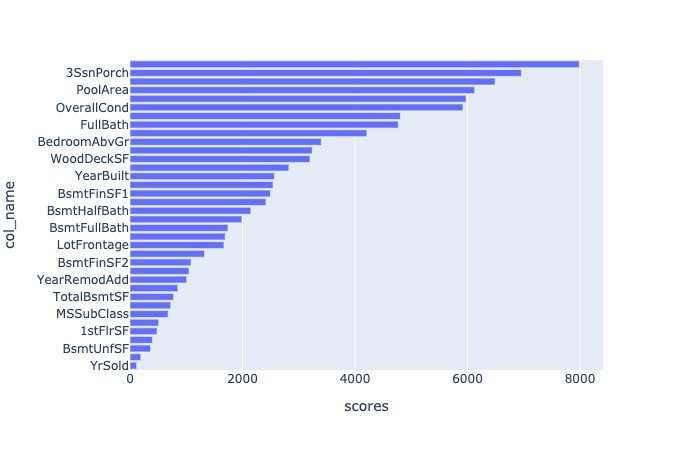

In [9]:
pred_df=pickle.load(open(out_path+"predicted_table.pkl","rb"))

score_df=global_df.copy()


score_df=score_df.iloc[:,1:]

feature_imp=score_df.groupby('col_name').agg("mean").sort_values(by="scores", ascending=False) #.scores.apply("mean") #.groupby("col_name").apply("mean")

feature_imp.scores=feature_imp.scores.apply(abs)


feature_imp=feature_imp[["scores"]]



def create_feature_importance_plot(dff):

    fig = px.bar(dff, x='scores', y=dff.index, orientation='h')
    
    fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
    
    return fig

create_feature_importance_plot(feature_imp)

In [10]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app = JupyterDash(__name__, external_stylesheets=external_stylesheets) # jupyter dash

In [11]:
import dash_table

In [12]:
app.layout = dash_table.DataTable(
    data=pred_df.to_dict('records'),
    columns=[{'id': c, 'name': c} for c in pred_df.columns],
    virtualization=True,
    fixed_rows={'headers': True},
    style_cell={'minWidth': 95, 'width': 95, 'maxWidth': 95},
    style_table={'height': 300}  # default is 500
)

In [13]:
# if __name__ == '__main__':
# app.run_server(debug=True,port=8001)

app.run_server(mode="jupyterlab", port=8023)

In [14]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app = JupyterDash(__name__, external_stylesheets=external_stylesheets) # jupyter dash

In [15]:
import dash_table

In [16]:
import dash  #(version 1.12.0)
from dash.dependencies import Input, Output
import dash_table
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

In [17]:
scores_range=(-98365.92454651206, 102145.65757499124)

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_time_series(dff, feature_name):
    dff=dff[dff.col_name==feature_name]
    trace1 = go.Line(
        x=dff['names'],
        y=dff['scores'],
        name='scores',
        marker=dict(
            color='rgb(34,163,192)',
            size=1),
        line_shape="vh",
        line_dash="solid"
    )
    trace2 = go.Scatter(
        x=dff['names'],
        y=dff['upper_bounds'],
        name='upper_bounds',
        marker=dict(
            color='rgb(12,100,100)',
            size=0.1),
        line_shape="vh",
        line_dash="solid"
    )
    
    trace3 = go.Scatter(
        x=dff['names'],
        y=dff['lower_bounds'],
        name='lower_bounds',
        marker=dict(
            color='rgb(200,1,100)',
            size=0.1),
        line_shape="vh",
        line_dash="solid"
    )
    
    fig = make_subplots()
    fig.add_trace(trace1)
    fig.add_trace(trace2)
    fig.add_trace(trace3)

    fig.update_xaxes(showgrid=False)
    fig.update_layout(height=400,width=400*1.618, yaxis_range=list(scores_range))

    return fig


In [19]:
# Sorting operators (https://dash.plotly.com/datatable/filtering)
app.layout = html.Div([
    dcc.Graph(
            id='example-graph-1',
        figure=create_time_series(global_df,"LotArea"), style={'display': 'inline-block'}),
    
    dcc.Graph(
        id="feature_importance_plot",
        figure=create_feature_importance_plot(feature_imp), style={"display":"inline-block"}),
    
    dash_table.DataTable(
        id='datatable-interactivity',
        columns=[
            {"name": i, "id": i, "deletable": True, "selectable": True, "hideable": True}
            if i == "iso_alpha3" or i == "year" or i == "id"
            else {"name": i, "id": i, "deletable": True, "selectable": True}
            for i in pred_df.columns
        ],
        data=pred_df.to_dict('records'),  # the contents of the table
        editable=True,              # allow editing of data inside all cells
        filter_action="native",     # allow filtering of data by user ('native') or not ('none')
        sort_action="native",       # enables data to be sorted per-column by user or not ('none')
        sort_mode="single",         # sort across 'multi' or 'single' columns
        column_selectable="multi",  # allow users to select 'multi' or 'single' columns
        row_selectable="multi",     # allow users to select 'multi' or 'single' rows
        row_deletable=True,         # choose if user can delete a row (True) or not (False)
        selected_columns=[],        # ids of columns that user selects
        selected_rows=[],           # indices of rows that user selects
        page_action="native",       # all data is passed to the table up-front or not ('none')
        page_current=0,             # page number that user is on
        page_size=6,                # number of rows visible per page
        style_cell={                # ensure adequate header width when text is shorter than cell's text
            'minWidth': 95, 'maxWidth': 95, 'width': 95
        },
        style_cell_conditional=[    # align text columns to left. By default they are aligned to right
            {
                'if': {'column_id': c},
                'textAlign': 'left'
            } for c in ['country', 'iso_alpha3']
        ],
        style_data={                # overflow cells' content into multiple lines
            'whiteSpace': 'normal',
            'height': 'auto'
        }
    ),

    html.Br(),
    html.Br(),
    html.Div(id='bar-container'),
    html.Div(id='choromap-container')

])


# -------------------------------------------------------------------------------------
# Create bar chart
@app.callback(
    Output(component_id='bar-container', component_property='children'),
    [Input(component_id='datatable-interactivity', component_property="derived_virtual_data"),
     Input(component_id='datatable-interactivity', component_property='derived_virtual_selected_rows'),
     Input(component_id='datatable-interactivity', component_property='derived_virtual_selected_row_ids'),
     Input(component_id='datatable-interactivity', component_property='selected_rows'),
     Input(component_id='datatable-interactivity', component_property='derived_virtual_indices'),
     Input(component_id='datatable-interactivity', component_property='derived_virtual_row_ids'),
     Input(component_id='datatable-interactivity', component_property='active_cell'),
     Input(component_id='datatable-interactivity', component_property='selected_cells')]
)
def update_bar(all_rows_data, slctd_row_indices, slct_rows_names, slctd_rows,
               order_of_rows_indices, order_of_rows_names, actv_cell, slctd_cell):
#     print('***************************************************************************')
#     print('Data across all pages pre or post filtering: {}'.format(all_rows_data))
#     print('---------------------------------------------')
#     print("Indices of selected rows if part of table after filtering:{}".format(slctd_row_indices))
#     print("Names of selected rows if part of table after filtering: {}".format(slct_rows_names))
#     print("Indices of selected rows regardless of filtering results: {}".format(slctd_rows))
#     print('---------------------------------------------')
#     print("Indices of all rows pre or post filtering: {}".format(order_of_rows_indices))
#     print("Names of all rows pre or post filtering: {}".format(order_of_rows_names))
#     print("---------------------------------------------")
#     print("Complete data of active cell: {}".format(actv_cell))
#     print("Complete data of all selected cells: {}".format(slctd_cell))

    dff = pd.DataFrame(all_rows_data)

    # used to highlight selected countries on bar chart
    colors = ['#7FDBFF' if i in slctd_row_indices else '#0074D9'
              for i in range(len(dff))]

    if "country" in dff and "did online course" in dff:
        return [
            dcc.Graph(id='bar-chart',
                      figure=px.bar(
                          data_frame=dff,
                          x="country",
                          y='did online course',
                          labels={"did online course": "% of Pop took online course"}
                      ).update_layout(showlegend=False, xaxis={'categoryorder': 'total ascending'})
                      .update_traces(marker_color=colors, hovertemplate="<b>%{y}%</b><extra></extra>")
                      )
        ]


# -------------------------------------------------------------------------------------
# Create choropleth map
@app.callback(
    Output(component_id='choromap-container', component_property='children'),
    [Input(component_id='datatable-interactivity', component_property="derived_virtual_data"),
     Input(component_id='datatable-interactivity', component_property='derived_virtual_selected_rows')]
)
def update_map(all_rows_data, slctd_row_indices):
    dff = pd.DataFrame(all_rows_data)

    # highlight selected countries on map
    borders = [5 if i in slctd_row_indices else 1
               for i in range(len(dff))]

    if "iso_alpha3" in dff and "internet daily" in dff and "country" in dff:
        return [
            dcc.Graph(id='choropleth',
                      style={'height': 700},
                      figure=px.choropleth(
                          data_frame=dff,
                          locations="iso_alpha3",
                          scope="europe",
                          color="internet daily",
                          title="% of Pop that Uses Internet Daily",
                          template='plotly_dark',
                          hover_data=['country', 'internet daily'],
                      ).update_layout(showlegend=False, title=dict(font=dict(size=28), x=0.5, xanchor='center'))
                      .update_traces(marker_line_width=borders, hovertemplate="<b>%{customdata[0]}</b><br><br>" +
                                                                              "%{customdata[1]}" + "%")
                      )
        ]


# -------------------------------------------------------------------------------------
# Highlight selected column
@app.callback(
    Output('datatable-interactivity', 'style_data_conditional'),
    [Input('datatable-interactivity', 'selected_columns')]
)
def update_styles(selected_columns):
    return [{
        'if': {'column_id': i},
        'background_color': '#D2F3FF'
    } for i in selected_columns]


# -------------------------------------------------------------------------------------


# if __name__ == '__main__':
#     app.run_server(debug=True)
app.run_server(mode="jupyterlab", port=8026)
    
# https://youtu.be/USTqY4gH_VM

/Users/a420777/opt/anaconda3/envs/whatif/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




# table and plot

In [14]:
# https://dash.plotly.com/datatable/interactivity

In [15]:
from jupyter_dash import JupyterDash # jupyter dash

In [16]:
import dash
from dash.dependencies import Input, Output
import dash_table
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# app = dash.Dash(__name__)
app = JupyterDash(__name__, external_stylesheets=external_stylesheets) # jupyter dash

In [17]:
app.layout = html.Div([
    dash_table.DataTable(
        id='datatable-interactivity',
        columns=[
            {"name": i, "id": i, "deletable": True, "selectable": True} for i in df.columns
        ],
        data=df.to_dict('records'),
        editable=True,
        filter_action="native",
        sort_action="native",
        sort_mode="multi",
        column_selectable="single",
        row_selectable="multi",
        row_deletable=True,
        selected_columns=[],
        selected_rows=[],
        page_action="native",
        page_current= 0,
        page_size= 10,
    ),
    html.Div(id='datatable-interactivity-container')
])

In [29]:
@app.callback(
    Output('datatable-interactivity', 'style_data_conditional'),
    Input('datatable-interactivity', 'selected_columns')
)
def update_styles(selected_columns):
    return [{
        'if': { 'column_id': i },
        'background_color': '#D2F3FF'
    } for i in selected_columns]

In [29]:
@app.callback(
    Output('datatable-interactivity-container', "children"),
    Input('datatable-interactivity', "derived_virtual_data"),
    Input('datatable-interactivity', "derived_virtual_selected_rows"))
def update_graphs(rows, derived_virtual_selected_rows):
    # When the table is first rendered, `derived_virtual_data` and
    # `derived_virtual_selected_rows` will be `None`. This is due to an
    # idiosyncrasy in Dash (unsupplied properties are always None and Dash
    # calls the dependent callbacks when the component is first rendered).
    # So, if `rows` is `None`, then the component was just rendered
    # and its value will be the same as the component's dataframe.
    # Instead of setting `None` in here, you could also set
    # `derived_virtual_data=df.to_rows('dict')` when you initialize
    # the component.
    if derived_virtual_selected_rows is None:
        derived_virtual_selected_rows = []

    dff = df if rows is None else pd.DataFrame(rows)

    colors = ['#7FDBFF' if i in derived_virtual_selected_rows else '#0074D9'
              for i in range(len(dff))]

    return [
        dcc.Graph(
            id=column,
            figure={
                "data": [
                    {
                        "x": dff["country"],
                        "y": dff[column],
                        "type": "bar",
                        "marker": {"color": colors},
                    }
                ],
                "layout": {
                    "xaxis": {"automargin": True},
                    "yaxis": {
                        "automargin": True,
                        "title": {"text": column}
                    },
                    "height": 250,
                    "margin": {"t": 10, "l": 10, "r": 10},
                },
            },
        )
        # check if column exists - user may have deleted it
        # If `column.deletable=False`, then you don't
        # need to do this check.
        for column in ["pop", "lifeExp", "gdpPercap"] if column in dff
    ]


# if __name__ == '__main__':
app.run_server(mode="jupyterlab", port=8026)

# vis

In [ ]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_time_series(dff, title):
    
    dff=
    
    trace1 = go.Line(
        x=dff['names'],
        y=dff['scores'],
        name='scores',
        marker=dict(
            color='rgb(34,163,192)',
            size=1),
        line_shape="vh",
        line_dash="solid"
    )
    trace2 = go.Scatter(
        x=dff['names'],
        y=dff['upper_bounds'],
        name='upper_bounds',
        marker=dict(
            color='rgb(12,100,100)',
            size=0.1),
        line_shape="vh",
        line_dash="solid"
    )
    
    trace3 = go.Scatter(
        x=dff['names'],
        y=dff['lower_bounds'],
        name='lower_bounds',
        marker=dict(
            color='rgb(200,1,100)',
            size=0.1),
        line_shape="vh",
        line_dash="solid"
    )
    
    fig = make_subplots()
    fig.add_trace(trace1)
    fig.add_trace(trace2)
    fig.add_trace(trace3)

    fig.update_xaxes(showgrid=False)
    fig.update_layout(height=400,width=400*1.618, yaxis_range=list(scores_range))

    return fig